# Inports

In [1]:
# General
import pandas as pd
import numpy as np
import datetime
import os
import glob
import sqlite3
# Data viz
import matplotlib.pyplot as plt
import seaborn as sns


# reading all the tables

In [2]:
my_path = os.path.join("..", "data")
csv_files = glob.glob(os.path.join(my_path, "*.csv"))

#databases to get the names only
circuits = pd.read_csv(csv_files[0])#info of the circuits
drivers = pd.read_csv(csv_files[4])#info dos moto
constructors = pd.read_csv(csv_files[1])#name of constructors
status = pd.read_csv(csv_files[12])
races = pd.read_csv(csv_files[9])# contain the years to merge with the other table

#cumulative standings
driver_standings = pd.read_csv(csv_files[5])# tabela acumulativa das pontuações por cada corrida, cada piloto
constructor_standings = pd.read_csv(csv_files[3])#same as driver_stangings

#databases with the info of the races
lap_times = pd.read_csv(csv_files[6])# only has 2011 foward
pit_stops = pd.read_csv(csv_files[7])# only has 2011 foward

#dataset of the qualifying
qualifying = pd.read_csv(csv_files[8])

#databases with results of each race for pilot, constructor, lap, .....
results = pd.read_csv(csv_files[10])#1950 foward
constructor_results = pd.read_csv(csv_files[2])# same as results but for constructor


* results_table (resultid,raceid,driverid, constructorid, status id) prim tab
* constructor_results   on constructorId and raceId, get  points
* constructor_standings on constructorId and raceId, get points position, wins
* driver_standings      on driverid and raceId, get points, position, wins
* drivers               on driverid, get dob, nationality, forename, surname, number, code
* lap_times             on raceId and driverId, get lap, position, time
* pit_stops             on raceId and driverId, get stop, lap, time, duration
* qualifying            on raceId driverId and constructorId, get position, q1,q2,q3
* races                 on raceid, get year, round, circuitId, date and time
* circuits              on circuitId, get name, location, country
* status                on statusId, get status

In [3]:
#Builgind the results table with year, driver names, date of birth, and circuits info
results = results.merge(races,how='left', on = 'raceId').rename(columns={'time_y':'time_start_race','name':'name_race'}) ;results.drop(columns='url',inplace=True)
results = results.merge(drivers,how='left', on = 'driverId').rename(columns={'nationality':'nationality_driver'}) ;results.drop(columns='url',inplace=True)
results = results.merge(circuits,how='left', on = 'circuitId').rename(columns={'name':'name_circuit'}) ;results.drop(columns='url',inplace=True)
results = results.merge(constructors,how='left', on = 'constructorId').rename(columns={'nationality':'nationality_constructor'}) ;results.drop(columns='url',inplace=True)
results = results.query('year > 2011')


lap_pit = lap_times.merge(pit_stops, on=['raceId','driverId','lap'],how='left').rename(columns={'time_x':'time_lap',
                                                                                                'time_y':'time_pit_stop'
                                                                                                })
lap_pit = lap_pit.merge(races,how='left', on = 'raceId'); lap_pit.drop(columns = 'url', inplace = True)

#results = results.merge(constructor_results,how='left', on = ['constructorId','raceId']).rename(columns={'points_y':'points_constructor_result'})
#results.merge(constructor_standings,how='left', on = ['constructorId','raceId']).rename(columns={'position_y':'position_constructor_standing'})
#results.merge(driver_standings,how='left', on = ['driverId','raceId'])
#results.merge(qualifying,how='left', on = ['driverId','raceId','constructorId'])


In [4]:
results

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,circuitRef,name_circuit,location,country,lat,lng,alt,constructorRef,name,nationality_constructor
21229,21232,860,18,1,3,2,1,1,1,25.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,mclaren,McLaren,British
21230,21233,860,20,9,1,6,2,2,2,18.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,red_bull,Red Bull,Austrian
21231,21234,860,1,1,4,1,3,3,3,15.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,mclaren,McLaren,British
21232,21235,860,17,9,2,5,4,4,4,12.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,red_bull,Red Bull,Austrian
21233,21236,860,4,6,5,12,5,5,5,10.0,...,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,ferrari,Ferrari,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25275,25281,1067,4,214,14,5,16,16,16,0.0,...,istanbul,Istanbul Park,Istanbul,Turkey,40.9517,29.405,130,alpine,Alpine F1 Team,French
25276,25282,1067,849,3,6,15,17,17,17,0.0,...,istanbul,Istanbul Park,Istanbul,Turkey,40.9517,29.405,130,williams,Williams,British
25277,25283,1067,20,117,5,10,18,18,18,0.0,...,istanbul,Istanbul Park,Istanbul,Turkey,40.9517,29.405,130,aston_martin,Aston Martin,British
25278,25284,1067,854,210,47,14,19,19,19,0.0,...,istanbul,Istanbul Park,Istanbul,Turkey,40.9517,29.405,130,haas,Haas F1 Team,American


<AxesSubplot:xlabel='duration', ylabel='position'>

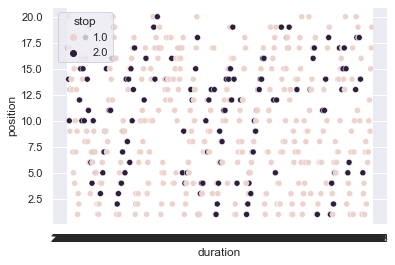

In [375]:

sns.boxplot(data=lap_pit.query('stop < 3 & year ==2018'), y= 'duration',x='stop')

<AxesSubplot:xlabel='name', ylabel='points'>

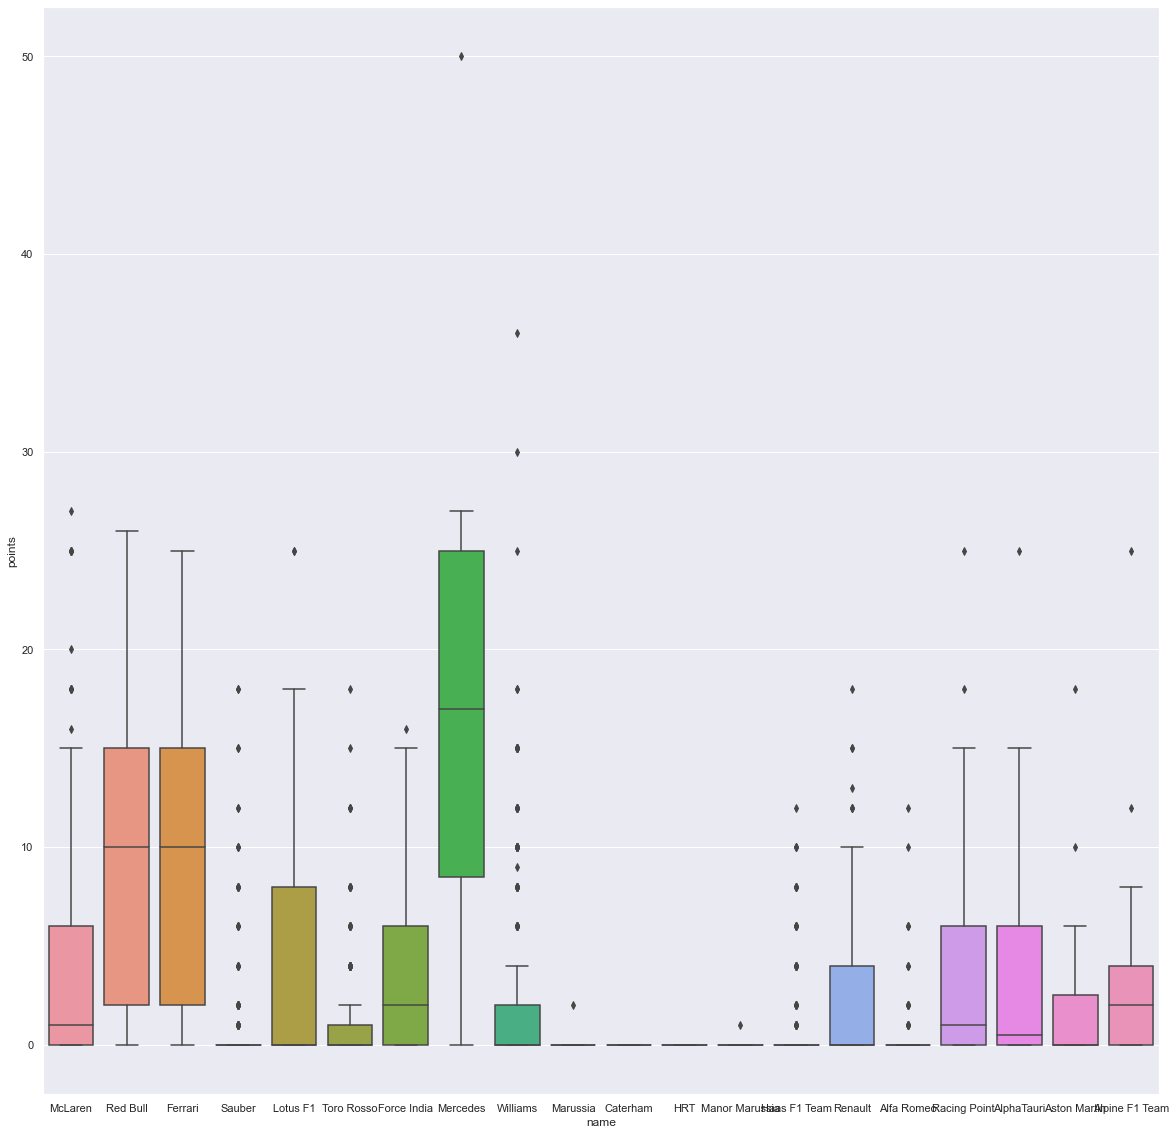

In [379]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(y=results['points'],x=results['name'])